# Problem 3

**a)** The training dataset has 60,000 images while the validation dataset has 10,000 images spread roughly equally across 10 classes. Take 50% of the images from each class for training and validation, i.e., about 30,000 training images and 5,000 validation images, almost evenly spread across all classes with a few minor differences. Plot the images of a few randomly chosen images from your dataset and if their labels are correct

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
import torchvision as thv
train = thv.datasets.MNIST('./', download =True, train =True)
val = thv.datasets.MNIST ('./', download =True, train = False )
print( train.data.shape , len( train.targets ))

torch.Size([60000, 28, 28]) 60000


In [ ]:
from torch.utils.data import Subset

In [ ]:
print(dir(train))


['__add__', '__annotations__', '__class__', '__class_getitem__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__orig_bases__', '__parameters__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__slots__', '__str__', '__subclasshook__', '__weakref__', '_check_exists', '_check_legacy_exist', '_format_transform_repr', '_is_protocol', '_load_data', '_load_legacy_data', '_repr_indent', 'class_to_idx', 'classes', 'data', 'download', 'extra_repr', 'mirrors', 'processed_folder', 'raw_folder', 'resources', 'root', 'target_transform', 'targets', 'test_data', 'test_file', 'test_labels', 'train', 'train_data', 'train_labels', 'training_file', 'transform', 'transforms']


In [ ]:
# Take 50% of the images from each class for training and validation


x_train= Subset(train.data, list(range(len(train) // 2)))
y_train= Subset(train.targets, list(range(len(train) // 2)))
x_val= Subset(val.data, list(range(len(val) // 2)))
y_val= Subset(val.targets, list(range(len(val) // 2)))

x_train = np.array(x_train)
y_train = np.array(y_train) # convert tensor to array
#y_val = np.array(y_val) # convert tensor to array

In [ ]:
# flatten it !
flatten = []
for image in x_train:
    flatten.append(image.ravel())

#x_train = np.array(flatten)

5

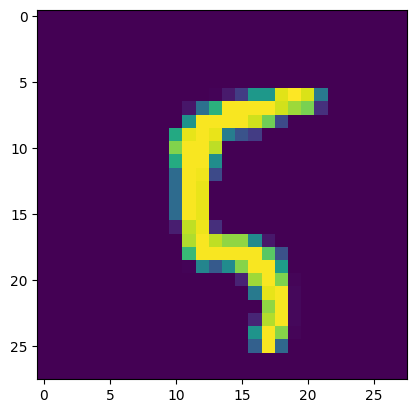

In [ ]:
plt.imshow(x_train[100]); y_train[100]

9

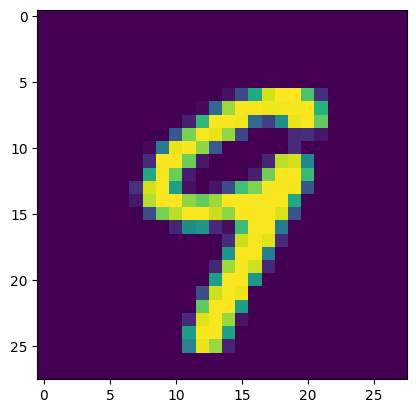

In [ ]:
plt.imshow(x_train[727]); y_train[727]

3

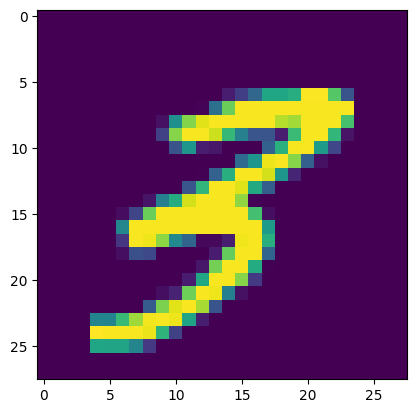

In [ ]:
plt.imshow(x_train[509]); y_train[509]

tensor(5)

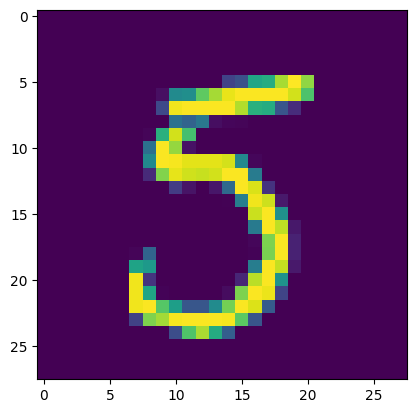

In [ ]:
plt.imshow(x_val[509]); y_val[509]

tensor(7)

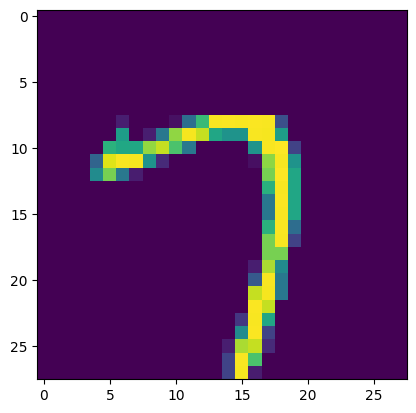

In [ ]:
plt.imshow(x_val[26]); y_val[26]

tensor(5)

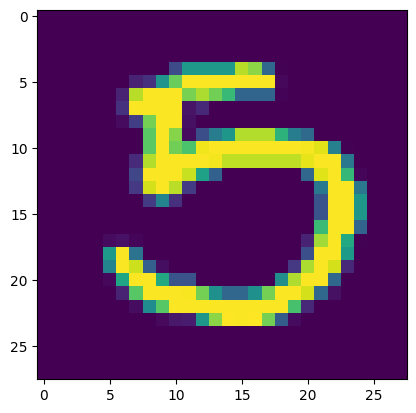

In [ ]:
plt.imshow(x_val[352]); y_val[352]

**b)** Write a linear layer; this includes the forward function

$h^{(l+1)} = h^{(l)} W^\top + b$

and the corresponding backward function that takes the gradient $\overline{h^{(l+1)}}$ and outputs $\overline{W}$, $\overline{b}$, and $\overline{h^{(l)}}$. Remember to write your function in such a way that it takes in a mini-batch of vectors $h^{(l)}$ as the input, i.e., if the feature vector $h^{(l)}$ is $a$-dimensional, for $b$ images in the mini-batch, your forward function will take as input $h^{(l)} \in \mathbb{R}^{b \times a}$ use $W \in \mathbb{R}^{c \times a}, \quad b \in \mathbb{R}^c$ and output a mini-batch of feature vectors of size $h^{(l+1)} \in \mathbb{R}^{b \times c}.$

Note that in this problem we have $a = 784$ because there are $28 \times 28$ pixels in MNIST images and $c = 10$ because there are 10 classes in MNIST. Use numpy to write the forward function.



In [ ]:
class linear_t :
    def __init__ (self):
        # initialize to appropriate sizes , fill with Gaussian entires
        self.w = np.random.normal(loc=0.0, scale=1.0, size=(10, 784))
        self.b = np.random.randn(1,10)
        # normalize to make the Frobenius norm of w, b equal to 1
        self.w = self.w/np.linalg.norm(self.w, ord='fro')
        self.b = self.b/np.linalg.norm(self.b, ord=2)

        self.dw, self.db = 0, 0

    def forward (self, h_l):
        # cache h^l in forward because we will need it to compute
        # dw in backward
        # h^{l+1} = ...
        h_l1 = h_l @ self.w.T + self.b
        self.h_l = h_l
        return h_l1

    def backward (self , dh_l1):
        # dh^l, dw , db = ...

        self.dw = dh_l1.T @ self.h_l
        # self.db = dh_l1
        self.db = np.sum(dh_l1, axis=0, keepdims=True)

        # notice that there is no need to cache dh^l
        dh_l = dh_l1 @ self.w
        return dh_l

    def zero_grad (self):
        # useful to delete the stored backprop gradients of the
        # previous mini - batch before you start a new mini - batch
        self.dw , self.db = 0*self.dw , 0*self.db

#### Part **(e)** Check the implement of forward and backward functions
Before moving on to training, let us check whether we have implemented the forward and backward correctly for all the three layers. Consider the function for the linear layer. Use a batch-size $\hat{b} = 1$ for this part. The forward function for the linear layer implements

$h^{(l+1)} = h^{(l)} W^\top + b$

which is easy enough. However, we would like to check our implementation of the backward function.


$\texttt{def backward(self,} dh^{(l+1)}):$

$\texttt{dh^{l}, self.dw, self.db = ...}$

$\texttt{return dh^{l}}$

Think carefully about your implementation of the backward function. Notice that if you call the backward function with the argument $h^{(l+1)} = [0, 0, \ldots, 0, 1, 0, 0, \ldots]$, i.e., there is a 1 at the $k^{\text{th}}$ element, the function is going to calculate the quantities

$\texttt{self.dw} = \frac{\partial h_k^{(l+1)}}{\partial W}, \quad \texttt{self.db} = \frac{\partial h_k^{(l+1)}}{\partial b}, \quad \texttt{dh\^{(l)}} = \frac{\partial h_k^{(l+1)}}{\partial h^{(l)}}.$

We now compute the estimate of the derivative using finite differences, e.g.,

$\frac{\partial h_k^{(l+1)}}{\partial W_{ij}} \approx \frac{\left( h^{(l)} (W + \epsilon)^\top \right)_k - \left( h^{(l)} (W - \epsilon)^\top \right)_k}{2 \epsilon_{ij}}.$

This idea checks the gradient with respect to only one element of $W$, namely $W_{ij}$. Do this for about 10 randomly chosen elements of $W$ and a few (5 should be enough) different entries $k$ of $h_k^{(l+1)}$ and check if the answer matches \texttt{self.dw} that you have implemented in the backward function. Repeat this process for the other two gradients.


\end{document}


In [ ]:

def linear_t_check(layer, x, epsilon, k):
    h_l = layer.forward(x)
    dh_l_1 = np.zeros(h_l.shape)
    # k = np.random.randint(0, 10)  # h_l.shape[1]
    dh_l_1[0, k] = 1  # Set the k-th element to 1

    layer.zero_grad()
    dh_l = layer.backward(dh_l_1)

    # copy
    dw = layer.dw
    db = layer.db
    dh_l = dh_l
    # initialization
    grad_dw = np.zeros(layer.w.shape)
    grad_db = np.zeros(layer.b.shape)
    grad_dh_l = np.zeros(x.shape)


    ########## error of w #########
    i, j = layer.w.shape
    idx_w = [(np.random.randint(i), np.random.randint(j)) for _ in range(10)]   #10 random entries

    for (i, j) in idx_w:
        w_1, w_2 = layer.w[i, j], layer.w[i, j] #copy
        #  W_ij + epsilon
        w_1 += epsilon
        pos_h_l = layer.forward(x)

        # W_ij - epsilon
        w_2 -= epsilon
        neg_h_l = layer.forward(x)

        grad_dw[i, j] = (pos_h_l[0, k] - neg_h_l[0,k]) / (2 * epsilon) # numerical

        # error = analytic - numerical
        error_w = abs(dw[i,j] - grad_dw[i,j])

        print(f"Error of W[{i}, {j}] is {error_w:.8e}")

    ########## error of b #########
    idx_b = [(0, np.random.randint(layer.b.shape[1])) for _ in range(10)]  # Single row for bias

    for (i, j) in idx_b:
        b_1, b_2 = layer.b[i, j], layer.b[i, j] # copy
        #  b_j + epsilon
        b_1 += epsilon
        pos_h_l = layer.forward(x)

        # b_j - epsilon
        b_2 -= epsilon
        neg_h_l = layer.forward(x)

        grad_db[i, j] = (pos_h_l[0,k] - neg_h_l[0,k]) / (2 * epsilon)    #  numerical gradient for bias


        # analytical - numerical for  bias
        error_b = np.abs(db[i,j] - grad_db[i,j])

        print(f"Error of b[{i}, {j}] is {error_b:.8e}")

    ########## error of h #########
    idx_h = [(0, np.random.randint(x.shape[1])) for _ in range(10)]  # dh_l shape is like x

    for (i, j) in idx_h:
        h_1, h_2 = x[0, j], x[0, j] #copy
        #  x_ij + epsilon
        h_1 += epsilon
        pos_h_l = layer.forward(x)

        # x_ij - epsilon
        h_2 -=  epsilon
        neg_h_l = layer.forward(x)

        grad_dh_l[i, j] = (pos_h_l[0, k] - neg_h_l[0,k]) / (2 * epsilon) #numerical gradient for dh_l

        # analytical - numerical
        error_h = np.abs(dh_l[i,j] - grad_dh_l[i,j])

        print(f"Error of h[{i}, {j}] is {error_h:.8e}")

layer = linear_t()

x = np.random.randn(1, 784)

for k in range(6):
  linear_t_check(layer, x, 1e-5, k)

Error of W[4, 599] is 0.00000000e+00
Error of W[2, 654] is 0.00000000e+00
Error of W[6, 93] is 0.00000000e+00
Error of W[6, 448] is 0.00000000e+00
Error of W[7, 310] is 0.00000000e+00
Error of W[1, 473] is 0.00000000e+00
Error of W[9, 222] is 0.00000000e+00
Error of W[8, 398] is 0.00000000e+00
Error of W[4, 332] is 0.00000000e+00
Error of W[1, 509] is 0.00000000e+00
Error of b[0, 0] is 1.00000000e+00
Error of b[0, 0] is 1.00000000e+00
Error of b[0, 9] is 0.00000000e+00
Error of b[0, 7] is 0.00000000e+00
Error of b[0, 6] is 0.00000000e+00
Error of b[0, 1] is 0.00000000e+00
Error of b[0, 7] is 0.00000000e+00
Error of b[0, 4] is 0.00000000e+00
Error of b[0, 9] is 0.00000000e+00
Error of b[0, 9] is 0.00000000e+00
Error of h[0, 58] is 1.18293229e-03
Error of h[0, 649] is 1.59146781e-02
Error of h[0, 341] is 1.84830157e-03
Error of h[0, 450] is 2.52922329e-04
Error of h[0, 104] is 1.14750614e-02
Error of h[0, 50] is 5.15843669e-03
Error of h[0, 553] is 8.83541495e-03
Error of h[0, 425] is 8.

In [ ]:
#def linear_check(eps, k):
 #   layer = linear_t()
  #  dh_l1 = np.zeros((1,10)) # batch size = 1
   # dh_l1[0, k] = 1
    #h_l = np.random.randn(1, 784)   #b=1, a=28x28

 #   layer.forward(h_l)
 #  dh_l = layer.backward(dh_l1)

 #  for _ in range(10):
        #i = np.random.randint(0, layer.w.shape[0])
        #j = np.random.randint(0, layer.w.shape[1])

    # original_w_ij = layer.w[i,j]

    #w_1, w_2 = np.copy(layer.w), np.copy(layer.w)

    #w_1[i,j], w_2[i,j] = w_1[i,j] + eps, w_2[i,j] - eps
    #grad_w = ((h_l @ w_1.T )[k] - (h_l @ w_2.T )[k]) / (2 * eps)

    #h_1, h_2 = np.copy(layer.h_l), np.copy(layer.h_l)
    #h_1[0, j], h_2[0, j] = h_1[0, j] + eps, h_2[0, j] - eps
    #grad_h = ((h_1 @ layer.w.T)[k] - (h_2 @ layer.w.T)[k]) / (2 * eps)


    # check gradient db
    #b_1, b_2 = np.copy(layer.b), np.copy(layer.b)
    #b_1[i], b_2[i] = b_1[i] + eps, b_2[i] - eps
    #grad_b = (b_1[k]-b_2[k]) / (2 * eps)

    #result = abs(layer.dw[i,j] - grad_w) , abs(layer.dw[i,j]-grad_w), abs(layer.db[0,k]-grad_b)
    #return np.concatenate([result[0].reshape(-1)]), result[1].reshape(-1), result[2].flatten()


# for a single k, there should be 30 element in the output array (10 w_ij/gradient x 3 gradients)
#linear_check(1e-5, 0)


**c)** Implement the rectified linear unit (ReLU) layer next. This will take the form of

$h^{(l+1)} = max(0, h^{(l)})$

where the max is performed element-wise on the elements of $h^{(l)}$. Write the forward function and the corresponding backward function

In [ ]:
class relu_t:
    def __init__(self):
        pass

    def forward(self, h_l):
        # max(0, h_l)
        self.h_l = h_l
        h_l1 = np.maximum(0, h_l)
        return h_l1

    def backward(self, dh_l1):
        dh_l = dh_l1 * (self.h_l > 0).astype(float)
        return dh_l

    #def relu_check(self, epsilon, idx, k):

        # dh_l1=[0,0,0,1,0,0,0,...]
        #dh_l1 = np.zeros(784)
        #dh_l1[k] = 1


        #h_l = np.random.randn(784)

        # max(0, h_l)
        #self.forward(h_l)
        #dh_l = self.backward(dh_l1) # 0 or d_h1

        #pos_disturb = self.h_l
        #neg_disturb = self.h_l

        # h_l +/- epsilon
        #pos_disturb[idx] = pos_disturb[idx] + epsilon
        #neg_disturb[idx] = neg_disturb[idx] - epsilon

        # max(0, h_l +/- epsilon)
        #numerical_grad = (np.maximum(0,pos_disturb)[k] - np.maximum(0,neg_disturb)[k]) / (2 * epsilon)
        #return abs(dh_l[idx] - numerical_grad) # analytic - numerical

#### Part **(e)** Check the implement of forward and backward functions

In [ ]:
def relu_check(epsilon, idx, k):
    relu = relu_t()

    # dh_l1=[0,0,0,1,0,0,0,...]
    dh_l1 = np.zeros(784) #h_l.shape[1]
    dh_l1[k] = 1

    h_l = np.random.randn(784)

    # max(0, h_l)
    relu.forward(h_l)
    dh_l = relu.backward(dh_l1) # 0 or d_h1

    pos_disturb = relu.h_l
    neg_disturb = relu.h_l

    # h_l +/- epsilon
    pos_disturb[idx] = pos_disturb[idx] + epsilon
    neg_disturb[idx] = neg_disturb[idx] - epsilon

    # max(0, h_l +/- epsilon)
    numerical_grad = (np.maximum(0,pos_disturb)[k] - np.maximum(0,neg_disturb)[k]) / (2 * epsilon)
    return abs(dh_l[idx] - numerical_grad) # analytic - numerical

In [ ]:
for idx in range(20, 26):
    for k in range(5):
        print(f"Error of entry{idx} at k{k}: {relu_check(epsilon=1e-5, idx=idx, k=k)}")

Error of entry20 at k0: 0.0
Error of entry20 at k1: 0.0
Error of entry20 at k2: 0.0
Error of entry20 at k3: 0.0
Error of entry20 at k4: 0.0
Error of entry21 at k0: 0.0
Error of entry21 at k1: 0.0
Error of entry21 at k2: 0.0
Error of entry21 at k3: 0.0
Error of entry21 at k4: 0.0
Error of entry22 at k0: 0.0
Error of entry22 at k1: 0.0
Error of entry22 at k2: 0.0
Error of entry22 at k3: 0.0
Error of entry22 at k4: 0.0
Error of entry23 at k0: 0.0
Error of entry23 at k1: 0.0
Error of entry23 at k2: 0.0
Error of entry23 at k3: 0.0
Error of entry23 at k4: 0.0
Error of entry24 at k0: 0.0
Error of entry24 at k1: 0.0
Error of entry24 at k2: 0.0
Error of entry24 at k3: 0.0
Error of entry24 at k4: 0.0
Error of entry25 at k0: 0.0
Error of entry25 at k1: 0.0
Error of entry25 at k2: 0.0
Error of entry25 at k3: 0.0
Error of entry25 at k4: 0.0


**d)** Next, we will write a combined softmax and cross-entropy loss layer. This is a layer that first performs the operation

$h_k^{(l+1)} = \frac{e^{h_k^{(l)}}}{\sum_{k'} e^{h_{k'}^{(l)}}}$

where $h_k^{(l)}$ is the $k^{\text{th}}$ element of the vector $h^{(l)}$. The input to this layer, i.e., $h^{(l)}$, is called the "logits". The output of this layer is a scalar; it is the negative log-probability of predicting the correct class, i.e.,

$\ell(y) = -\log \left( h_y^{(l+1)} \right)$

where $y$ is the true label of the image. For a mini-batch with $\hat{b}$ images, the average loss will be

$\ell(\{y_i\}_{i=1,\dots,\hat{b}}) = -\frac{1}{\hat{b}} \sum_{i=1}^{\hat{b}} \log \left( h_{y_i}^{(l+1)} \right)$

We can also output the error of predictions in the forward function. It is computed as

$\text{error} = \frac{1}{\hat{b}} \sum_{i=1}^{\hat{b}} 1 \left\{ y_i \neq \arg\max_k h_k^{(l+1)} \right\}$

and measures the number of mistakes the network makes.



In [ ]:
class softmax_cross_entropy_t :
    def __init__ (self):
        # no parameters , nothing to initialize
        pass

    def forward (self , h_l, y):
        # compute average loss ell(y) over a mini - batch
        # Softmax function
        exp_h = np.exp(h_l - np.max(h_l, axis=1, keepdims=True))
        h_l1 = exp_h / np.sum(exp_h, axis=1, keepdims=True)

        # Cross-entropy loss
        # log_likelihood = -np.log(softmax[np.arange(batch_size), y])


        b = h_l.shape[0]
        ell = np.sum(-np.log(h_l1[range(b), y]))/b


        # Error calculation (misclassifications)
        preds = np.argmax(h_l1, axis=1)
        error = np.mean(preds != y)

        self.h_l1 = h_l1
        self.y = y
        return ell, error

    def backward (self):
        # as we saw in the notes , the backprop input to the
        # loss layer is 1, so this function does not take any
        # arguments
        # Backprop through softmax and cross-entropy

        #exp_h = np.exp(h_l - np.max(h_l, axis=1, keepdims=True))
        #h_l1 = exp_h / np.sum(exp_h, axis=1, keepdims=True)

        # Compute the gradient of the loss w.r.t. the logits
        #b = self.h_l.shape[0]
        #d_hl = h_l1
        #d_hl[range(b), y] -= 1
        #d_hl = d_hl / b  # normalize

        b = self.h_l1.shape[0]
        dh_l = self.h_l1.copy()
        dh_l[np.arange(b), self.y] -= 1  # Subtract 1 from the true class's probability
        dh_l /= b  # Normalize by batch size
        #print(dh_l)

        return dh_l

#### Part **(e)** Check the implement of forward and backward functions

In [ ]:

def softmax_cross_entropy_t_check(h_l, y, epsilon, i, j):

    layer = softmax_cross_entropy_t()
    layer.forward(h_l, y)
    dh_l = layer.backward()

    # Initialization
    numerical_grad = np.zeros(h_l.shape)

    h_1, h_2 = h_l[i, j], h_l[i, j]
    # h_l_ij + epsilon
    h_1 = h_1 + epsilon
    pos_disturb, _ = layer.forward(h_l, y)

    # h_l_ij - epsilon
    h_2 = h_2 - epsilon
    neg_disturb, _ = layer.forward(h_l, y)

    numerical_grad[i, j] = (pos_disturb - neg_disturb) / (2 * epsilon)

    # analytical - numerical
    error = abs(dh_l[i, j] - numerical_grad[i, j])

    print(f"Error of i={i} and j={j} is {error:.5e}")

    return

In [ ]:
h_l = np.random.randn(1, 10)

y = np.array([np.random.randint(0, 10)])

i, j = h_l.shape
idx = [(np.random.randint(i), np.random.randint(j)) for _ in range(10)]

for (i, j) in idx:
  softmax_cross_entropy_t_check(h_l, y, 1e-5, i, j)

Error of i=0 and j=6 is 3.37012e-02
Error of i=0 and j=3 is 8.48668e-02
Error of i=0 and j=0 is 5.57101e-02
Error of i=0 and j=7 is 6.74190e-01
Error of i=0 and j=7 is 6.74190e-01
Error of i=0 and j=2 is 3.00140e-02
Error of i=0 and j=3 is 8.48668e-02
Error of i=0 and j=5 is 1.09710e-01
Error of i=0 and j=0 is 5.57101e-02
Error of i=0 and j=3 is 8.48668e-02


**(f)** Train a network using functions built above.

In [ ]:
import numpy as np

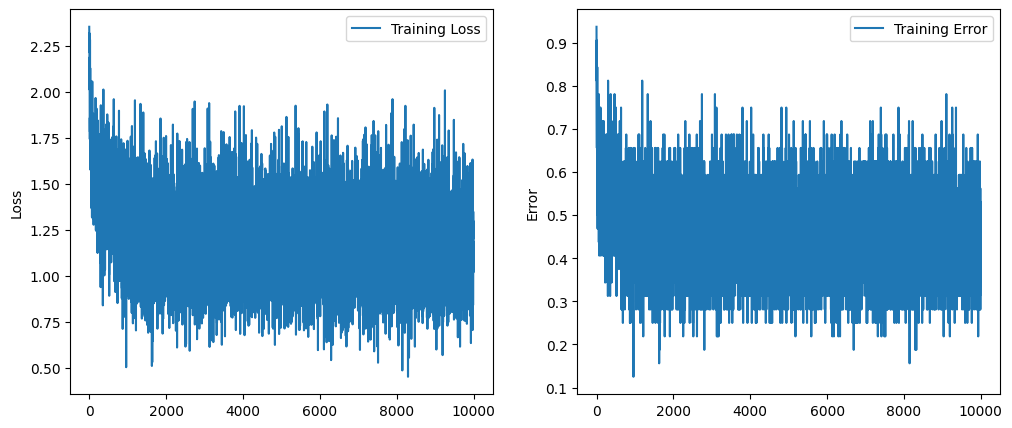

In [ ]:
# initialize all the layers
l1 = linear_t ()
l2 = relu_t()
l3 = softmax_cross_entropy_t()

net = [l1 , l2 , l3]
lr = 0.1
train_loss, train_err = [], []

# train for at least 1000 iterations
for t in range(10000):
    # 1. sample a mini-batch of size = 32
    # each image in the mini-batch is chosen uniformly randomly from the training set
    idx = np.random.choice(len(x_train), 32, replace = False)
    x = [x_train[i] for i in idx]
    y = [y_train[i] for i in idx]

    x,y = np.array(x), np.array(y)
    x = x.reshape(-1, 784) / 255
    #x = x/255

    # 2. zero gradient buffer
    #for l in net:
        #l. zero_grad ()
    l1.zero_grad()

    # 3. forward pass
    h1 = l1.forward(x)
    h2 = l2.forward(h1)
    ell , error = l3.forward(h2 , y)

    # 4. backward pass
    dh2 = l3.backward ()
    dh1 = l2.backward(dh2)
    dx = l1.backward (dh1)

    # 5. gather backprop gradients
    dw , db = l1.dw , l1.db

    # 6. print some quantities for logging
    # and debugging
    train_loss.append(ell)
    train_err.append(error)
    # print(t, ell , error)

    # 7. one step of SGD
    l1.w = l1.w - lr*dw
    l1.b = l1.b - lr*db


plt.figure(figsize=(12, 5))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss')
plt.ylabel('Loss')
plt.legend()

# Plot Error
plt.subplot(1, 2, 2)
plt.plot(train_err, label='Training Error')
plt.ylabel('Error')
plt.legend()

plt.show()

In [ ]:
def validate (w, b):
# 1. iterate over mini - batches from the validation dataset
# note that this should not be done randomly , we want to check
# every image only once
    total_loss, total_error = 0, 0
    num_batch = 0
    for i in range(0, 5000 , 32):
        # 1. sample data
        x, y = x_val[i:i+32], y_val[i:i+32]

        x,y = np.array(x), np.array(y)
        x = x.reshape(-1, 784) / 255

        # 2. compute forward pass and error
        h1 = l1.forward(x)
        h2 = l2.forward(h1)
        ell, error = l3.forward(h2, y)

        b = x.shape[0]
        total_loss += b * ell
        total_error += b * error
        num_batch += b

      # Compute average loss and error
    avg_loss = total_loss / num_batch
    avg_error = total_error / num_batch

    return avg_loss, avg_error


In [ ]:
# validation loss and error
val_loss_set = []
val_error_set = []


for update in range(10000):
    # 1. Sample a mini-batch
    #x, y = x_val[i:i+32], y_val[i:i+32]
    #x,y = np.array(x), np.array(y)
    #x = x.reshape(-1, 784) / 255
    idx = np.random.choice(range(len(x_val)), 32, replace = False)
    x = [x_val[i] for i in idx]
    y = [y_val[i] for i in idx]

    x,y = np.array(x), np.array(y)
    x = x.reshape(-1, 784) / 255

    # 2. zero gradient buffer
    l1.zero_grad()

    # 3. forward pass
    h1 = l1.forward(x)
    h2 = l2.forward(h1)
    ell, error = l3.forward(h2, y)

    # 4. backward pass
    dh2 = l3.backward()
    dh1 = l2.backward(dh2)
    dx = l1.backward(dh1)

    # 5. gather backprop gradients
    dw, db = l1.dw, l1.db

    # 6. print
    #train_loss.append(ell)
    #train_err.append(error)

    # 7. perform one step of SGD
    l1.w = l1.w - lr * dw
    l1.b = l1.b - lr * db

    # Validate every 1000 updates
    if update > 0 and update % 1000 == 0:
        val_loss, val_error = validate(l1.w, l1.b)
        val_loss_set.append(val_loss)
        val_error_set.append(val_error)


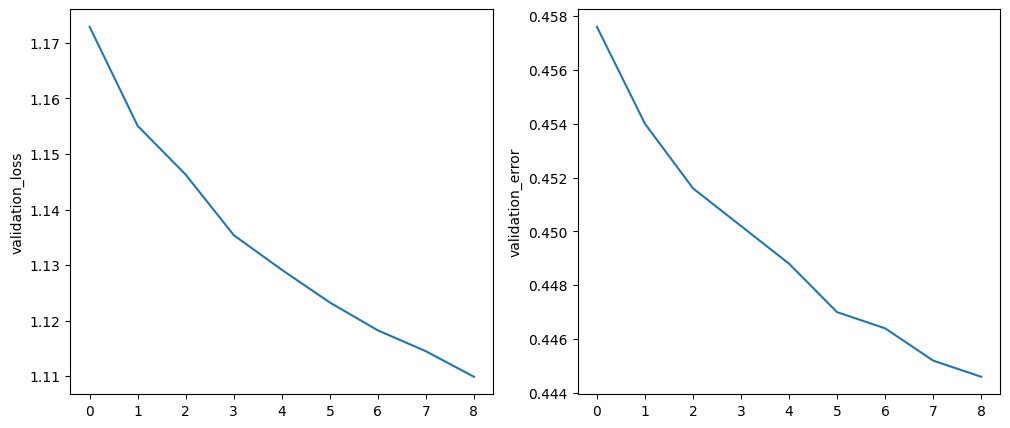

In [ ]:
plt.figure(figsize=(12, 5))

# Plot Training and Validation Loss
plt.subplot(1, 2, 1)
plt.plot(val_loss_set, label='Validation Loss')
plt.ylabel("validation_loss")

# Plot Training and Validation Error
plt.subplot(1, 2, 2)
plt.plot(val_error_set, label='Validation Error')
plt.ylabel("validation_error")

plt.show()

**(h)** Train a network using inbuild functions

In [ ]:
import torch
import torch.nn as nn

class network(nn.Module):
    def __init__(self):
        super(network, self).__init__()
        #self.layer1 = nn.Sequential(nn.Linear(54, 128), nn.BatchNorm1d(128), nn.ReLU(), nn.Dropout(p=0.5))
        self.layer1 = nn.Linear(784, 10)
        self.layer2 = nn.ReLU()
        #self.layer2 = nn.Sequential(nn.Linear(128, 128), nn.ReLU())
        #self.layer3 = nn.Linear(128, 7)

    def forward(self, X):
        # Implement the forward pass
        X = self.layer1(X.float())
        return self.layer2(X)

    def train_model(self, n_epochs, lr):
        #loader = torch.utils.data.DataLoader(train_set,batch_size=100)

        opt = torch.optim.SGD(self.parameters(), lr=lr)
        criterion = nn.CrossEntropyLoss()

        train_loss = []
        train_err = []
        val_loss_set = []
        val_err_set = []

        for i in range(n_epochs):

            # 1. sample a mini -batch of size = 32
            # each image in the mini -batch is chosen uniformly randomly from the training set
            idx = np.random.choice(range(len(x_train)), 32, replace = False)
            x = [x_train[i] for i in idx]
            y = [y_train[i] for i in idx]

            x = np.array(x)
            y = np.array(y)
            x = x.reshape(-1, 28 * 28)
            x = x / 255

            x = torch.from_numpy(x)
            y = torch.from_numpy(y)

            # 2. zero gradient buffer
            opt.zero_grad()

            # 3. forward pass
            input = x # cannot directly use x in self.forward function, otherwise only one output
            output = self.forward(input)
            loss = criterion(output, y)
            train_loss.append(loss.item())

            predictions = output.argmax(1)
            accuracy = (predictions == y).float().mean().item()
            train_err.append(1 - accuracy)

            # 4. backward pass
            loss.backward()

            # 5. gather backprop gradients
            opt.step()

            if update > 0 and update % 1000 == 0:
                val_loss, val_error = validate_network()
                val_loss_set.append(val_loss)
                val_error_set.append(val_error)
        return train_loss, train_err, val_loss_set, val_error_set






In [ ]:
def validate_network():
    # 1. iterate over mini -batches from the validation dataset
    # note that this should not be done randomly , we want to check
    # every image only once
    total_loss , total_error = 0, 0
    num_batch = 0

    for i in range(0, 5000 , 32):
        x, y = x_val[i:i+32,], y_val[i:i+32]
        x,y = np.array(x), np.array(y)
        x = x.reshape(-1, 784) / 255

        net=network()
        # 2. compute forward pass and error
        opt = torch.optim.SGD(net.parameters(), lr=lr)
        criterion = nn.CrossEntropyLoss()
        opt.zero_grad()
        output = net(x)
        total_loss += criterion(output, y).item()
        total_error += (output.argmax(1) != y).type(torch.float).sum().item() / 32
        num_batch += 1

    return total_loss / num_batch, total_error / num_batch



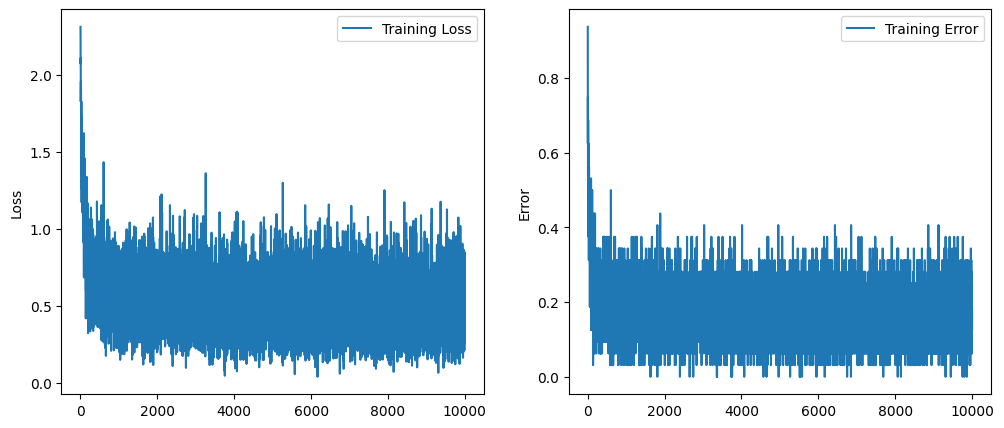

In [ ]:
model = network()
train_loss_2, train_err_2, val_loss_2, val_err_2 = model.train_model(lr=0.1, n_epochs=10000)

plt.figure(figsize=(12, 5))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(train_loss_2, label='Training Loss')
plt.ylabel('Loss')
plt.legend()

# Plot Error
plt.subplot(1, 2, 2)
plt.plot(train_err_2, label='Training Error')
plt.ylabel('Error')
plt.legend()

plt.show()

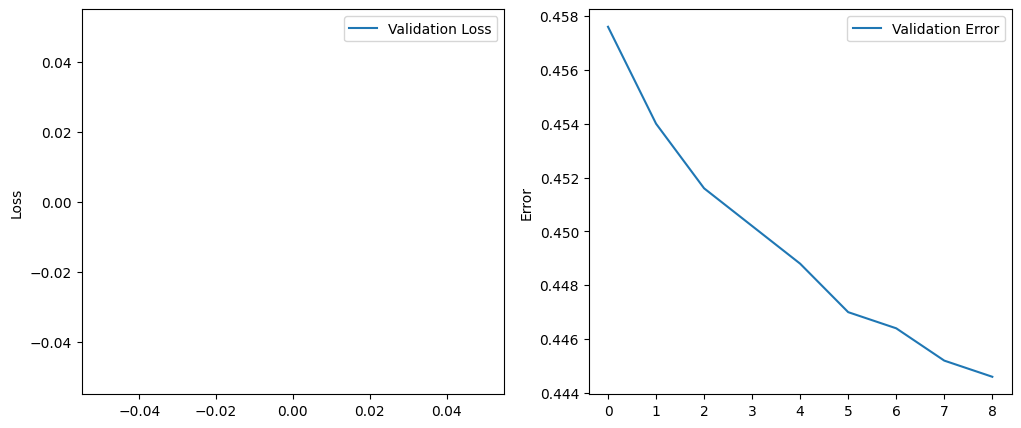

In [ ]:
plt.figure(figsize=(12, 5))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(val_loss_2, label='Validation Loss')
plt.ylabel('Loss')
plt.legend()

# Plot Error
plt.subplot(1, 2, 2)
plt.plot(val_err_2, label='Validation Error')
plt.ylabel('Error')
plt.legend()

plt.show()